In [1]:
from accelerator.elements.quadrupole import QuadrupoleThin
from accelerator.elements.drift import Drift
from accelerator.lattice import Lattice

import numpy as np
import matplotlib.pyplot as plt

In [2]:
quad = QuadrupoleThin(1)
quad

QuadrupoleThin(f=1, name='quadrupole_thin_0')

In [3]:
quad.m_h

TransferMatrix([[ 1.,  0.,  0.],
                [-1.,  1.,  0.],
                [ 0.,  0.,  1.]])

In [4]:
quad.m_v

TransferMatrix([[1., 0., 0.],
                [1., 1., 0.],
                [0., 0., 1.]])

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:ylabel='x (m)'>,
        <AxesSubplot:xlabel='s (m)', ylabel="x'">], dtype=object))

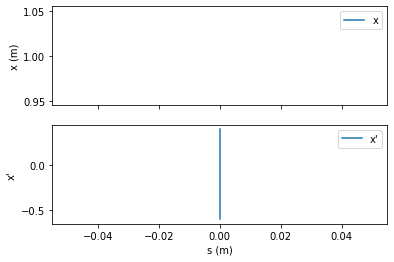

In [5]:
quad.plot(plane='h')

In [6]:
drift_l = 1  # meters
focal_length = 10  # meters
FODO = [QuadrupoleThin(focal_length), Drift(drift_l), QuadrupoleThin(-focal_length), Drift(drift_l)]
FODO

[QuadrupoleThin(f=10, name='quadrupole_thin_1'),
 Drift(l=1, name='drift_0'),
 QuadrupoleThin(f=-10, name='quadrupole_thin_2'),
 Drift(l=1, name='drift_1')]

In [7]:
lattice = Lattice(FODO)
twiss = lattice.transport(twiss=lattice.m_h.twiss_solution)

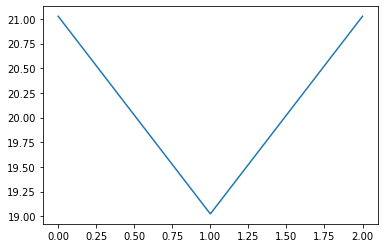

In [8]:
plt.plot(twiss.s, twiss.beta)

# Effect on the phasespace

In [9]:
from accelerator import Lattice
from accelerator import Beam

In [10]:
lattice = Lattice([QuadrupoleThin(1)])
lattice

Lattice([QuadrupoleThin(f=1, name='quadrupole_thin_3')])

In [11]:
lattice.m_h.twiss

TwissTransferMatrix([[ 1., -0.,  0.],
                     [ 1.,  1., -0.],
                     [ 1.,  2.,  1.]])

In [12]:
ellipses = lattice.transport(phasespace=Beam().ellipse([1,0,1]))

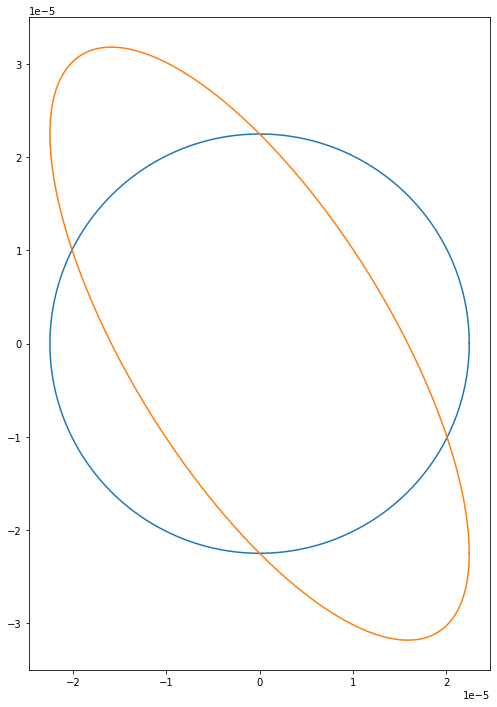

In [13]:
plt.figure(figsize=(12,12))
plt.plot(ellipses.u, ellipses.u_prime)
plt.gca().set_aspect('equal')